In [69]:
# Beta-Lactamase Data
# Rifat Saeed 
! wget https://github.com/dataprofessor/beta-lactamase/raw/main/beta_lactamase_CHEMBL29.zip

--2021-10-31 01:48:53--  https://github.com/dataprofessor/beta-lactamase/raw/main/beta_lactamase_CHEMBL29.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/beta-lactamase/main/beta_lactamase_CHEMBL29.zip [following]
--2021-10-31 01:48:53--  https://raw.githubusercontent.com/dataprofessor/beta-lactamase/main/beta_lactamase_CHEMBL29.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1416390 (1.4M) [application/zip]
Saving to: ‘beta_lactamase_CHEMBL29.zip.1’

beta_lactamase_CHEM 100%[===================>]   1.35M  --.-KB/s    in 0.04s   

2021-10-31 01:48:54 (32.8 MB/s) - ‘beta

In [70]:
# UnZip data 
! unzip beta_lactamase_CHEMBL29.zip

Archive:  beta_lactamase_CHEMBL29.zip
replace CHEMBL1075063.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CHEMBL1075063.csv       
  inflating: CHEMBL1075073.csv       
  inflating: CHEMBL1075081.csv       
  inflating: CHEMBL1075159.csv       
  inflating: CHEMBL1075174.csv       
  inflating: CHEMBL1075210.csv       
  inflating: CHEMBL1169593.csv       
  inflating: CHEMBL1250341.csv       
  inflating: CHEMBL1255121.csv       
  inflating: CHEMBL1255122.csv       
  inflating: CHEMBL1255123.csv       
  inflating: CHEMBL1255124.csv       
  inflating: CHEMBL1255130.csv       
  inflating: CHEMBL1255135.csv       
  inflating: CHEMBL1255143.csv       
  inflating: CHEMBL1255144.csv       
  inflating: CHEMBL1255145.csv       
  inflating: CHEMBL1255147.csv       
  inflating: CHEMBL1255155.csv       
  inflating: CHEMBL1287595.csv       
  inflating: CHEMBL1287596.csv       
  inflating: CHEMBL1287597.csv       
  inflating: CHEMBL1287599.csv       
  inflating: CHEMBL12

In [71]:
# Loading data to Pandas' dataframe
import zipfile
import pandas as pd
zf=zipfile.ZipFile("beta_lactamase_CHEMBL29.zip","r")
df=pd.concat((pd.read_csv(zf.open(f)) for f in zf.namelist()))
df

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
0,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,=,10.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
1,CHEMBL996,CO[C@@]1(NC(=O)Cc2cccs2)C(=O)N2C(C(=O)O)=C(COC...,NaN,NaN,NaN,Kcat/Km,NaN,Gil1,assay format
2,CHEMBL617,CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)Cc3ccc...,=,598.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
3,CHEMBL702,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3[C@@H...,=,3400.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
4,CHEMBL1449,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](C(=O)O)c3ccsc3...,=,10000.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
...,...,...,...,...,...,...,...,...,...
13,CHEMBL561555,COC(=O)CC(N)(CC(=O)OC)C(=O)OCc1ccccc1,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
14,CHEMBL561821,NC(CC(=O)OCc1ccccc1)(CC(=O)OCc1ccccc1)C(=O)OCc...,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
15,CHEMBL561896,COC(=O)CC(CC(=O)OC)(NC(=O)Cc1ccccc1)C(=O)OC,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
16,CHEMBL563044,COC(=O)C(CC(=O)OCc1ccccc1)(CC(=O)OCc1ccccc1)NC...,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format


In [72]:
# Bar Plot of missing and non_missing pchembl value data 
import matplotlib.pyplot as plt
missing=df.pchembl_value.isnull().sum()
nonmissing=df.pchembl_value.notnull().sum()
x=['missing','Non-Missing']
y=[missing,nonmissing]


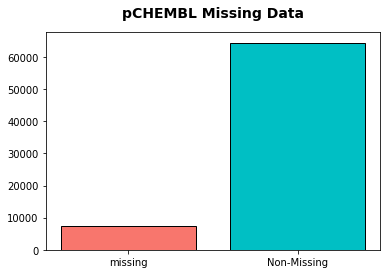

In [73]:
fig,ax=plt.subplots()
p=ax.bar(x,y,color=['#F8766D','#00BFC4'], ec='black')
ax.set_title('pCHEMBL Missing Data', fontsize=14, fontweight='bold',pad=15)
plt.show()


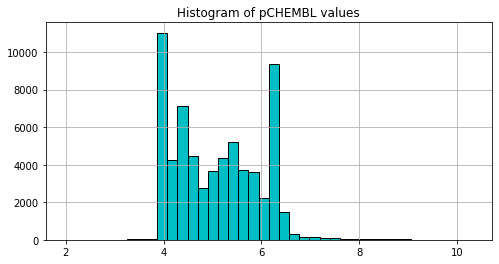

In [74]:
# Histogram of Pchembl Value
df.pchembl_value.hist(bins=40,figsize=(8,4), color='#00BFC4',ec='black')
plt.title('Histogram of pCHEMBL values')
plt.show()

In [75]:
# Dropping null value data from pCHEMBL value
df2=df[df.pchembl_value.notnull()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64424 entries, 47 to 109
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  64424 non-null  object 
 1   canonical_smiles    64408 non-null  object 
 2   standard_relation   64424 non-null  object 
 3   standard_value      64424 non-null  float64
 4   standard_units      64424 non-null  object 
 5   standard_type       64424 non-null  object 
 6   pchembl_value       64424 non-null  float64
 7   target_pref_name    64424 non-null  object 
 8   bao_label           64424 non-null  object 
dtypes: float64(2), object(7)
memory usage: 4.9+ MB


In [76]:
df2.groupby('molecule_chembl_id').mean()

,standard_value,pchembl_value
molecule_chembl_id,,
CHEMBL1018,316.200000,6.500000
CHEMBL1024,11220.200000,4.950000
CHEMBL1028,2818.400000,5.550000
CHEMBL1036,39.800000,7.400000
CHEMBL104,27500.000000,4.580000
...,...,...
CHEMBL97643,11220.200000,4.950000
CHEMBL977,631.000000,6.200000
CHEMBL98406,63095.700000,4.200000


In [77]:
df2.groupby('molecule_chembl_id').std()

,standard_value,pchembl_value
molecule_chembl_id,,
CHEMBL1018,NaN,NaN
CHEMBL1024,NaN,NaN
CHEMBL1028,NaN,NaN
CHEMBL1036,NaN,NaN
CHEMBL104,10606.601718,0.169706
...,...,...
CHEMBL97643,NaN,NaN
CHEMBL977,NaN,NaN
CHEMBL98406,NaN,NaN


In [78]:
# IC50 data
df2=df2.loc[df2.standard_type=='IC50']

In [79]:
# Dropping duplicate data 
df2.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
# Beta-lactamase
df2=df2.loc[df2.target_pref_name=='Beta-lactamase']

In [81]:
# Binary Classification of pchembl value data  
df2.loc[df2.pchembl_value<=5,'pchembl_value'] = 0 # inactive

In [82]:
df2.loc[df2.pchembl_value>5,'pchembl_value'] = 1 # active 

In [83]:
y = df2['pchembl_value'] #feature being predicted

In [84]:
df3 = pd.concat([df2['canonical_smiles'],df2['molecule_chembl_id']], axis=1 )
f=df3.to_csv('molecule11.smi', sep='\t', index=False, header=False)

In [85]:
!wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
!unzip fingerprints_xml.zip

--2021-10-31 01:56:46--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2021-10-31 01:56:46--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip.1’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2021-10-31 01:56:47 (89.2 MB/s) - ‘fingerprints_xml.zip.1’ saved [10871/10871]

Archive:  fingerp

In [86]:
#listing and sorting the downloaded files
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [87]:
#Creating a list of present files
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [88]:
#Creating Data Dictionary
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

In [89]:
!pip install padelpy

In [90]:
#Setting the fingerprint module
from padelpy import padeldescriptor
fingerprint = 'Substructure'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]
padeldescriptor(mol_dir='molecule11.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [91]:
descriptors = pd.read_csv(fingerprint_output_file)

In [92]:
descriptors

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,...,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,CHEMBL1089781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
1,CHEMBL1795566,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
2,CHEMBL1795568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
3,CHEMBL1795567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
4,CHEMBL1795572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,CHEMBL332565,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,1
770,CHEMBL121924,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,1
771,CHEMBL333330,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
772,CHEMBL123481,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1


In [93]:
X = descriptors.drop('Name', axis=1) 

In [94]:
# Removing all low-variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.9 * (1 - .9)))
X1 = selection.fit_transform(X)
X1.shape 


(774, 22)

In [138]:
X1.shape

(774, 22)

In [136]:
import numpy as np
import pandas as pd

a1=np.array(y)
a=np.concatenate((a1,X1), axis=1)
df4 = pd.DataFrame(a)
df4.shape
df4.corr().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.00,-0.17,0.18,-0.02,-0.04,-0.00,0.05,-0.14,0.07,-0.15,0.27,-0.03,-0.01,-0.08,0.02,0.30,-0.20,-0.19,0.26,0.04,0.07,0.07,0.01
1,-0.17,1.00,-0.04,0.33,-0.12,0.48,0.17,0.12,-0.28,0.23,-0.54,0.20,0.03,-0.03,0.52,-0.55,-0.03,0.25,-0.50,0.28,0.27,0.27,0.27
2,0.18,-0.04,1.00,-0.38,0.05,-0.23,-0.10,-0.17,0.19,-0.53,0.41,-0.05,-0.12,-0.23,-0.17,0.48,-0.25,-0.57,0.42,-0.37,-0.35,-0.35,-0.47
3,-0.02,0.33,-0.38,1.00,0.02,0.56,0.16,0.09,-0.37,0.54,-0.46,0.00,0.21,0.16,0.52,-0.52,0.02,0.61,-0.45,0.60,0.59,0.59,0.83
4,-0.04,-0.12,0.05,0.02,1.00,-0.24,-0.09,-0.08,0.03,-0.10,0.08,-0.11,-0.07,-0.10,-0.21,0.09,-0.08,-0.02,0.07,-0.17,-0.16,-0.16,0.05
5,-0.00,0.48,-0.23,0.56,-0.24,1.00,0.11,0.14,-0.42,0.40,-0.60,0.28,0.26,0.22,0.75,-0.62,0.03,0.32,-0.52,0.56,0.57,0.57,0.51
6,0.05,0.17,-0.10,0.16,-0.09,0.11,1.00,-0.09,-0.27,0.21,0.05,-0.06,-0.08,-0.12,0.20,0.05,-0.23,0.09,0.09,0.19,0.20,0.20,0.21
7,-0.14,0.12,-0.17,0.09,-0.08,0.14,-0.09,1.00,0.02,0.23,-0.20,0.24,-0.01,0.05,-0.18,-0.28,0.27,0.13,-0.27,0.10,0.12,0.12,0.17
8,0.07,-0.28,0.19,-0.37,0.03,-0.42,-0.27,0.02,1.00,-0.26,0.36,-0.21,-0.01,0.04,-0.34,0.38,0.16,-0.26,0.48,-0.35,-0.33,-0.33,-0.34
9,-0.15,0.23,-0.53,0.54,-0.10,0.40,0.21,0.23,-0.26,1.00,-0.41,0.07,0.11,0.11,0.26,-0.47,0.23,0.75,-0.44,0.43,0.46,0.46,0.67


In [146]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       774 non-null    float64
 1   1       774 non-null    float64
 2   2       774 non-null    float64
 3   3       774 non-null    float64
 4   4       774 non-null    float64
 5   5       774 non-null    float64
 6   6       774 non-null    float64
 7   7       774 non-null    float64
 8   8       774 non-null    float64
 9   9       774 non-null    float64
 10  10      774 non-null    float64
 11  11      774 non-null    float64
 12  12      774 non-null    float64
 13  13      774 non-null    float64
 14  14      774 non-null    float64
 15  15      774 non-null    float64
 16  16      774 non-null    float64
 17  17      774 non-null    float64
 18  18      774 non-null    float64
 19  19      774 non-null    float64
 20  20      774 non-null    float64
 21  21      774 non-null    float64
 22  22

In [147]:
df4.drop(columns=[3,5],axis=1, inplace=True)


In [149]:
df4.drop(columns=[11,12,19,22],axis=1, inplace=True)

In [151]:
X1=df4.drop(columns=[0],axis=1)

In [152]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       774 non-null    float64
 1   2       774 non-null    float64
 2   4       774 non-null    float64
 3   6       774 non-null    float64
 4   7       774 non-null    float64
 5   8       774 non-null    float64
 6   9       774 non-null    float64
 7   10      774 non-null    float64
 8   13      774 non-null    float64
 9   14      774 non-null    float64
 10  15      774 non-null    float64
 11  16      774 non-null    float64
 12  17      774 non-null    float64
 13  18      774 non-null    float64
 14  20      774 non-null    float64
 15  21      774 non-null    float64
dtypes: float64(16)
memory usage: 96.9 KB


In [153]:
# Random Forest Classifier model 
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier

In [154]:
# Splitting data into traing and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)
X_train.shape, y_train.shape 
X_test.shape, y_test.shape

((155, 16), (155, 1))

In [155]:
# Fitting model
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators =500, max_depth=100)
# Train the model on training data
rf.fit(X_train,y_train) 
ac_train=rf.score(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [156]:
ac_train

0.875605815831987

In [99]:
depth = [10,20,30,40,50,60,70,80,90,100]
n_est = range(100, 600,100)
for d in depth:
    for n in n_est:
      rf = RandomForestClassifier(n_estimators=n, max_depth=d)
      rf.fit(X_train,y_train) 
      ac_train_score=rf.score(X_train,y_train)
      print('depth: ',d,'nestimators: ',n,ac_train_score)

depth:  10 nestimators:  100 0.8739903069466882
depth:  10 nestimators:  200 0.875605815831987
depth:  10 nestimators:  300 0.875605815831987
depth:  10 nestimators:  400 0.875605815831987
depth:  10 nestimators:  500 0.8739903069466882
depth:  20 nestimators:  100 0.875605815831987
depth:  20 nestimators:  200 0.875605815831987
depth:  20 nestimators:  300 0.875605815831987
depth:  20 nestimators:  400 0.875605815831987
depth:  20 nestimators:  500 0.875605815831987
depth:  30 nestimators:  100 0.875605815831987
depth:  30 nestimators:  200 0.875605815831987
depth:  30 nestimators:  300 0.875605815831987
depth:  30 nestimators:  400 0.875605815831987
depth:  30 nestimators:  500 0.875605815831987
depth:  40 nestimators:  100 0.875605815831987
depth:  40 nestimators:  200 0.875605815831987
depth:  40 nestimators:  300 0.875605815831987
depth:  40 nestimators:  400 0.875605815831987
depth:  40 nestimators:  500 0.875605815831987
depth:  50 nestimators:  100 0.875605815831987
depth:  50 

In [157]:
y_train_pred=rf.predict(X_train)

In [158]:
from sklearn.metrics import accuracy_score
ac_train = accuracy_score(y_train, y_train_pred)

In [159]:
# Training accuracy
ac_train

0.875605815831987

In [160]:
y_pred = rf.predict(X_test)

In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac_test = accuracy_score(y_test, y_pred)

In [162]:
# Testing data accuracy
ac_test

0.8258064516129032

In [163]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(y_test, y_pred)) 
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.850
Recall: 0.942
F1 Score: 0.893


In [164]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [165]:
cm

array([[ 15,  20],
       [  7, 113]])

In [166]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test,y_pred)
print(mse) 
rmse=sqrt(mse)
print(rmse)

0.17419354838709677
0.41736500618415145


In [115]:
import numpy as np
df = pd.DataFrame(X1)
y=pd.DataFrame(y)
#df4=pd.concat([df,y], axis=1)
y.shape

(774, 1)

In [117]:
import numpy as np
import pandas as pd

a1 = np.array(df)

In [118]:
a2=np.array(y)

In [119]:
a=np.concatenate((a1,a2), axis=1)

In [120]:
a.shape

(774, 23)

In [132]:
df4 = pd.DataFrame(a)

In [133]:
# Correlation matrix
df4.corr().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.00,-0.04,0.33,-0.12,0.48,0.17,0.12,-0.28,0.23,-0.54,0.20,0.03,-0.03,0.52,-0.55,-0.03,0.25,-0.50,0.28,0.27,0.27,0.27,-0.17
1,-0.04,1.00,-0.38,0.05,-0.23,-0.10,-0.17,0.19,-0.53,0.41,-0.05,-0.12,-0.23,-0.17,0.48,-0.25,-0.57,0.42,-0.37,-0.35,-0.35,-0.47,0.18
2,0.33,-0.38,1.00,0.02,0.56,0.16,0.09,-0.37,0.54,-0.46,0.00,0.21,0.16,0.52,-0.52,0.02,0.61,-0.45,0.60,0.59,0.59,0.83,-0.02
3,-0.12,0.05,0.02,1.00,-0.24,-0.09,-0.08,0.03,-0.10,0.08,-0.11,-0.07,-0.10,-0.21,0.09,-0.08,-0.02,0.07,-0.17,-0.16,-0.16,0.05,-0.04
4,0.48,-0.23,0.56,-0.24,1.00,0.11,0.14,-0.42,0.40,-0.60,0.28,0.26,0.22,0.75,-0.62,0.03,0.32,-0.52,0.56,0.57,0.57,0.51,-0.00
5,0.17,-0.10,0.16,-0.09,0.11,1.00,-0.09,-0.27,0.21,0.05,-0.06,-0.08,-0.12,0.20,0.05,-0.23,0.09,0.09,0.19,0.20,0.20,0.21,0.05
6,0.12,-0.17,0.09,-0.08,0.14,-0.09,1.00,0.02,0.23,-0.20,0.24,-0.01,0.05,-0.18,-0.28,0.27,0.13,-0.27,0.10,0.12,0.12,0.17,-0.14
7,-0.28,0.19,-0.37,0.03,-0.42,-0.27,0.02,1.00,-0.26,0.36,-0.21,-0.01,0.04,-0.34,0.38,0.16,-0.26,0.48,-0.35,-0.33,-0.33,-0.34,0.07
8,0.23,-0.53,0.54,-0.10,0.40,0.21,0.23,-0.26,1.00,-0.41,0.07,0.11,0.11,0.26,-0.47,0.23,0.75,-0.44,0.43,0.46,0.46,0.67,-0.15
9,-0.54,0.41,-0.46,0.08,-0.60,0.05,-0.20,0.36,-0.41,1.00,-0.25,-0.24,-0.30,-0.46,0.90,-0.31,-0.60,0.80,-0.38,-0.36,-0.36,-0.44,0.27


Text(0.5, 1.0, 'Correlation matrix')

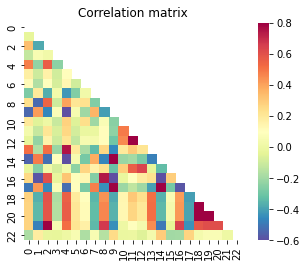

In [121]:
# Heatmap 
import seaborn as sns
import matplotlib.pyplot as plt
corrs = df4.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-0.6, vmax=.8)
plt.title('Correlation matrix')

In [122]:
# PCA technique for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)

In [123]:
X2 = pca.fit_transform(X)
sum(pca.explained_variance_ratio_)

0.973029449598884

In [124]:
# evaluate a Random Forest Classifier model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)
X_train.shape, y_train.shape 
X_test.shape, y_test.shape

((155, 50), (155, 1))

In [126]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators =500, max_depth=100)
# Train the model on training data
rf.fit(X_train,y_train) 
ac_train=rf.score(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [127]:
ac_train

0.9095315024232633

In [128]:
ac_test=rf.score(X_test,y_test)

In [129]:
ac_test

0.8064516129032258

In [130]:
# Cross Validation for model performance
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X2,y, cv=10).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

0.7365134865134865